In [75]:
# importing required libraries

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [76]:
# Reading in the dataset

train_df = pd.read_csv('train_CSRqzyo.csv',index_col='ID')
test_df = pd.read_csv('test_wYRkl1c.csv',index_col='ID')

## Inital Analysis of the data

In [77]:
train_shape=train_df.shape[0]
test_shape=test_df.shape[0]

In [78]:
train_df=shuffle(train_df)

In [79]:
train_df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [80]:
train_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
ID,,,,,,,,,,
NCF42OUT045,17.35,Low Fat,0.167723,Household,176.3712,2002,NaN,Tier 2,Supermarket Type1,1054.6272
FDB16OUT035,8.21,Low Fat,0.044917,Dairy,88.5198,2004,Small,Tier 2,Supermarket Type1,1133.8574
FDI28OUT049,14.30,Low Fat,0.026363,Frozen Foods,78.3302,1999,Medium,Tier 1,Supermarket Type1,1267.6832
FDT24OUT046,12.35,Regular,0.000000,Baking Goods,76.2328,1997,Small,Tier 1,Supermarket Type1,1544.6560
DRL01OUT035,19.50,Regular,0.077158,Soft Drinks,232.4958,2004,Small,Tier 2,Supermarket Type1,2804.3496


In [81]:
test_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
ID,,,,,,,,,
FDW58OUT049,20.750,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
FDW14OUT017,8.300,reg,0.038428,Dairy,87.3198,2007,NaN,Tier 2,Supermarket Type1
NCN55OUT010,14.600,Low Fat,0.099575,Others,241.7538,1998,NaN,Tier 3,Grocery Store
FDQ58OUT017,7.315,Low Fat,0.015388,Snack Foods,155.0340,2007,NaN,Tier 2,Supermarket Type1
FDY38OUT027,NaN,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3


In [82]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8523 entries, NCF42OUT045 to FDE29OUT013
Data columns (total 10 columns):
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(5)
memory usage: 732.4+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
Index: 5681 entries, FDW58OUT049 to FDU37OUT045
Data columns (total 9 columns):
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Ite

## Univariate Analysis 

In [83]:
train_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [84]:
train_df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [85]:
train_df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [86]:
train_df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [87]:
train_df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [88]:
# importing required libraries
import seaborn as sns
sns.set()
sns.set(style="darkgrid")

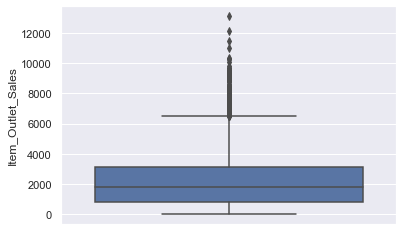

In [89]:
sns.boxplot(train_df['Item_Outlet_Sales'], orient='vertical');

**From the diagram we can see that data has outliers. We shall deal with outliers later**  

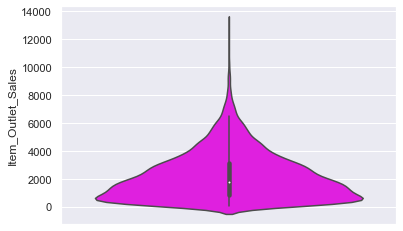

In [90]:
sns.violinplot(train_df['Item_Outlet_Sales'], orient='vertical', color='magenta');

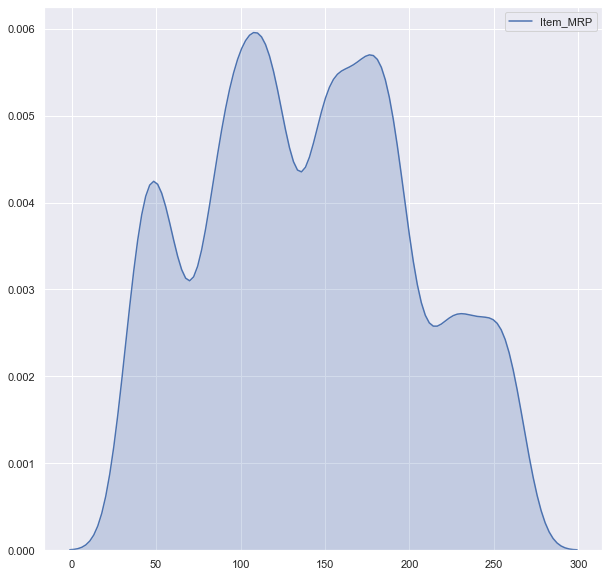

In [91]:
# distribution of Item MRP
plt.figure(figsize=(10,10))
sns.kdeplot(train_df['Item_MRP'], shade=True);

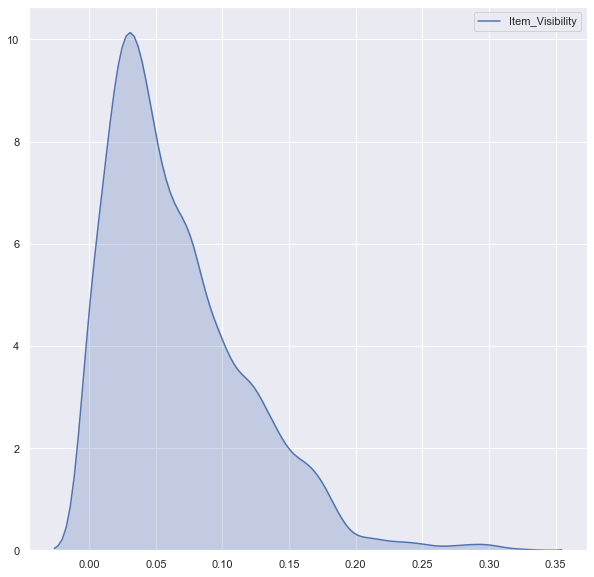

In [92]:
# distribution of Item Visibility
plt.figure(figsize=(10,10))
sns.kdeplot(train_df['Item_Visibility'], shade=True);

## Bivariate Analysis  

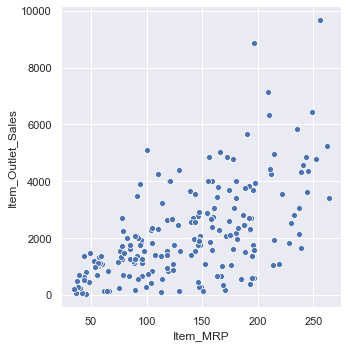

In [93]:
# scatter plot
sns.relplot(x="Item_MRP", y="Item_Outlet_Sales", data=train_df[:200], kind="scatter");

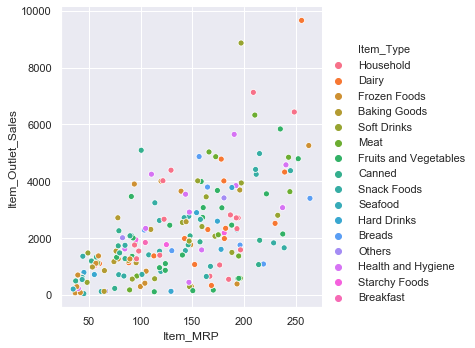

In [94]:
# hue semantic
sns.relplot(x="Item_MRP", y="Item_Outlet_Sales", hue="Item_Type",data=train_df[:200]);

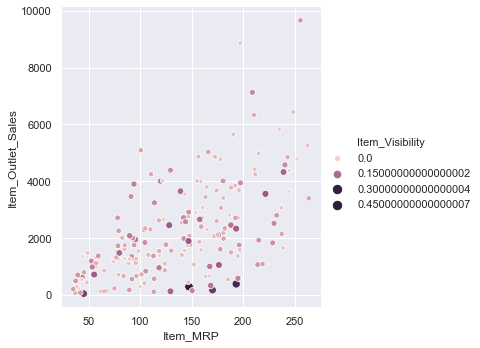

In [95]:
# bubble plot
sns.relplot(x="Item_MRP", y="Item_Outlet_Sales", data=train_df[:200], kind="scatter", size="Item_Visibility", hue="Item_Visibility");

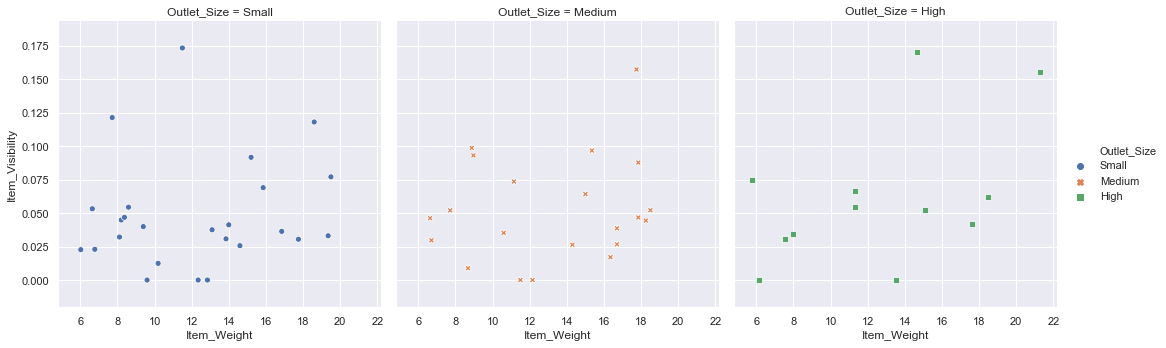

In [96]:
# subplots for each of the category of Outlet_Size
sns.relplot(x="Item_Weight", y="Item_Visibility",hue='Outlet_Size',style='Outlet_Size',col='Outlet_Size',data=train_df[:100]);

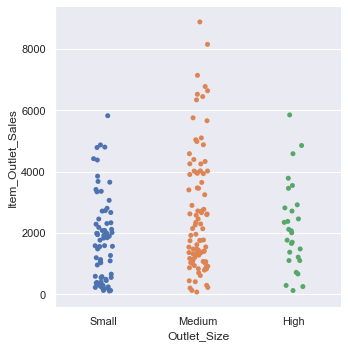

In [97]:
# Strip plot
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales", kind='strip',data=train_df[:250]);

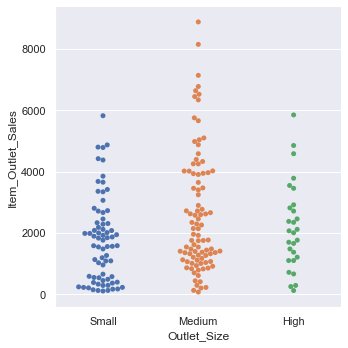

In [98]:
# Swarm plot
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales", kind='swarm',data=train_df[:250]);

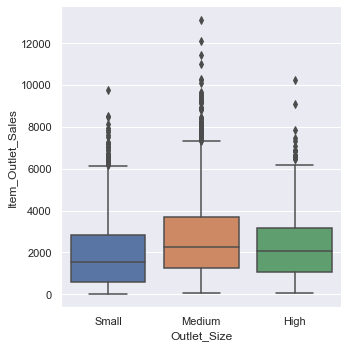

In [99]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales",kind="box",data=train_df);

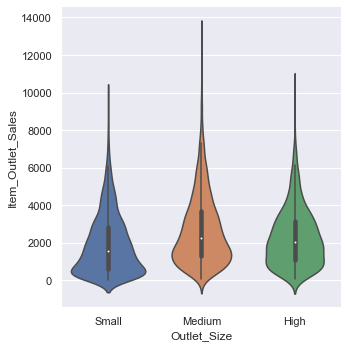

In [100]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales",kind="violin",data=train_df);

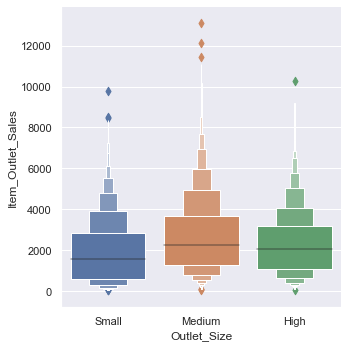

In [101]:
#boxen plot
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales",kind="boxen",data=train_df);

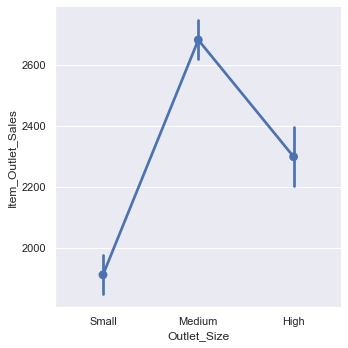

In [102]:
# point plot
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales",kind="point",data=train_df);

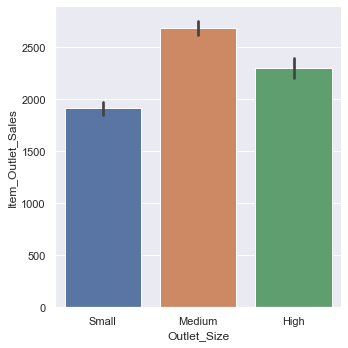

In [103]:
# Bar plot
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales",kind="bar",data=train_df);

## Missing Value Treatment  

In [104]:
# Checking for missing values in columns in dataset
train_df.columns[train_df.isna().any()].tolist()

['Item_Weight', 'Outlet_Size']

In [105]:
test_df.columns[test_df.isna().any()].tolist()

['Item_Weight', 'Outlet_Size']

In [106]:
# missing value imputation
train_df['Outlet_Size']=train_df['Outlet_Size'].ffill().bfill()
train_df['Item_Weight'].fillna(np.mean(train_df['Item_Weight']),inplace=True)

In [107]:
test_df['Outlet_Size']=test_df['Outlet_Size'].ffill().bfill()
test_df['Item_Weight'].fillna(np.mean(test_df['Item_Weight']),inplace=True)

In [108]:
# Rechecking for missing values in columns in dataset
train_df.columns[train_df.isna().any()].tolist()

[]

In [109]:
test_df.columns[test_df.isna().any()].tolist()

[]

## Outlier Treatment  

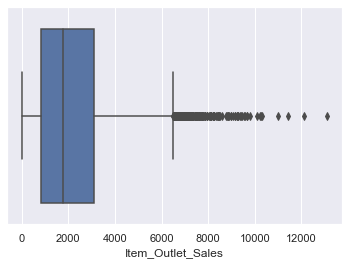

In [110]:
sns.boxplot(train_df['Item_Outlet_Sales'], orient='horizontal');

In [111]:
train_df.loc[train_df['Item_Outlet_Sales']>10000,'Item_Outlet_Sales']=np.mean(train_df['Item_Outlet_Sales'])

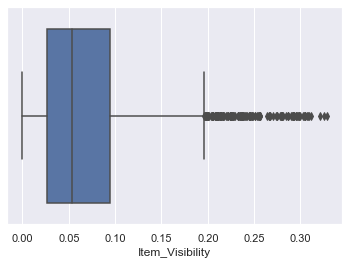

In [112]:
sns.boxplot(train_df['Item_Visibility'], orient='horizontal');

In [113]:
train_df.loc[train_df['Item_Visibility']>0.25,'Item_Visibility']=np.mean(train_df['Item_Visibility'])

## Variable Transformation  

In [114]:
cleanup_cols={'Item_Fat_Content':{'Low Fat':0,'Regular':1,'LF': 2,'reg':3,'low fat':4},'Item_Type':{'Fruits and Vegetables':1,'Snack Foods':2
,'Household':3,'Frozen Foods':4,'Dairy':5,'Canned':6,'Baking Goods':7,'Health and Hygiene':8,'Soft Drinks':9,'Meat':10,'Breads':11,'Hard Drinks':12,
'Others':0,'Starchy Foods':13 ,'Breakfast':14 ,'Seafood':15 },'Outlet_Size':{'Medium':1,'Small':0,'High':2},'Outlet_Location_Type':{'Tier 3':2
,'Tier 2':1,'Tier 1':0},'Outlet_Type':{'Supermarket Type1':1,'Grocery Store':0,'Supermarket Type3':3,'Supermarket Type2':2}}

In [115]:
train_df.replace(cleanup_cols, inplace=True)

In [116]:
test_df.replace(cleanup_cols, inplace=True)

In [117]:
train_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
ID,,,,,,,,,,
NCF42OUT045,17.35,0,0.167723,3,176.3712,2002,0,1,1,1054.6272
FDB16OUT035,8.21,0,0.044917,5,88.5198,2004,0,1,1,1133.8574
FDI28OUT049,14.30,0,0.026363,4,78.3302,1999,1,0,1,1267.6832
FDT24OUT046,12.35,1,0.000000,7,76.2328,1997,0,0,1,1544.6560
DRL01OUT035,19.50,1,0.077158,9,232.4958,2004,0,1,1,2804.3496


In [118]:
test_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
ID,,,,,,,,,
FDW58OUT049,20.750000,0,0.007565,2,107.8622,1999,1,0,1
FDW14OUT017,8.300000,3,0.038428,5,87.3198,2007,1,1,1
NCN55OUT010,14.600000,0,0.099575,0,241.7538,1998,1,2,0
FDQ58OUT017,7.315000,0,0.015388,2,155.0340,2007,1,1,1
FDY38OUT027,12.695633,1,0.118599,5,234.2300,1985,1,2,3


## Modeling  

In [119]:
x_train=train_df.drop(['Item_Fat_Content', 'Item_Outlet_Sales'],axis=1)

In [120]:
y_train=train_df['Item_Outlet_Sales']

In [121]:
from sklearn.tree import DecisionTreeRegressor

In [122]:
reg=DecisionTreeRegressor(min_samples_split=150,min_samples_leaf=20,splitter='random')

In [123]:
reg.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=20,
                      min_samples_split=150, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='random')

In [124]:
reg.score(x_train,y_train)

0.6061880198793343

In [125]:
test_1=test_df.drop(['Item_Fat_Content'],axis=1)

In [126]:
pred=reg.predict(test_1)

In [127]:
results={'ID':test.index,'Item_Outlet_Sales':pred}

In [128]:
output=pd.DataFrame(results)

In [129]:
output.to_csv('output.csv',index=False)